# Анализ оттока клиентов регионального банка

<div style="border:solid #20b2aa 2px; padding: 20px">
    
- Презентация: https://disk.yandex.ru/i/qgcbsekyNrPrLQ


**Проблема:**
- В региональном банке был зафиксирован высокий уровень оттока клиентов. Прошлые анализы клиентов и сегментация устарели и больше не работают. Отделу маркетинга необходим новый анализ и сегментация клиентов для разработки дальнейшей маркетинговой стратегии и кампании по уменьшению доли отточных клиентов

**Задача:** 

- Провести анализ клиентской базы регионального банка, выделить сегменты клиентов, которые склонны уходить.
- Подготовить презентацию для отдела маркетинга с результатами анализа

<div style="border:solid #20b2aa 2px; padding: 20px">

**Выводы**
    
**Средний процент оттока клиентов по банку равен 18.2%**
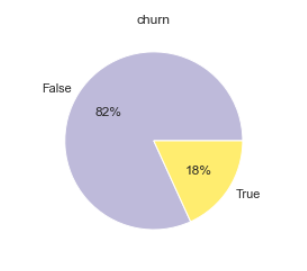

**В ходе исследования мы выделили следующие признаки, характерные отточным клиентам**: 
- мужчины (доля отточных клиентов 23.6%)
- из Ярославля (19%) или Ростова (18.6%)
- с оценкой стоимости больше 2х
- с 2я или более продуктами
- без кредитной карты (25.5%)
- проявлявшие активность за последние 30 дней (24.4%)
- возраста 50-60 лет (27%) или 25-40 лет (20.1%)
- с балансом от 700 тыс до 1 млн (25.7%)
- кредитный скоринг от 850 до 900 баллов (26.7%)
- с зарплатой от 100тыс до 300тыс (20%) или от 300тыс до 500тыс (19.3%)

Корреляция оттока со всеми признаками, кроме количества продуктов, слабая. **Наибольшая корреляция оттока выявлена с признаком количества продуктов - 30%**

**Мы выделили 2 сегмента клиентов, которые склонны уходить:**
1. В первый сегмент вошли клиенты, у которых **2 и более продуктов банка и кредитный скоринг 850-900 быллов**. Размер такого сегмента 1871 клиент.В данном сегменте **доля отточных клиентов равна 33.5%**
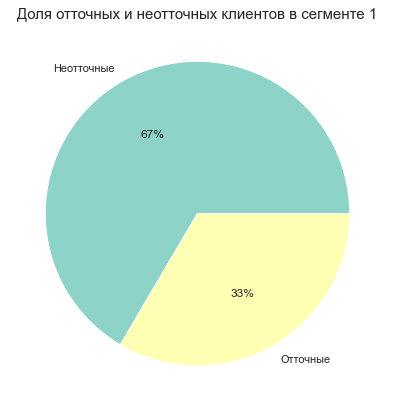

Данному сегменту характерны следующие признаки:
- преимущественно проживают в Ярославле
- имеют оценку собственности 3-5 баллов
- возраст от 25 до 40 лет
- имеют доход от 30тыс до 300тыс
    
**Рекомендации для сегмента1:**
- ***Проанализировать, использование каких продуктов банка наиболее влияет на отток***
- ***Проанализировать интерфейс сайта на предмет удобства использования, если у клиента 2 и более продуктов банка***
    
2. Во второй сегмент вошли **мужчины с кредитной картой, которые проявляли активность за последние 30 дней**. Размер такого сегмента 698 клиентов. В данном сегменте **доля отточных клиентов равна 42.3%**
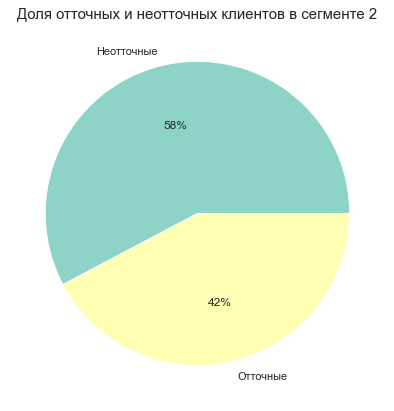
    
Данному сегменту характерны следующие признаки:
- преимущественно владеют 2я продуктами
- баланс на счете более 1 млн
- возраст от 25 до 40 лет
- имеют доход от 100тыс до 300тыс

**Рекомендации для сегмента2:**
- ***Проанализировать условия по депозитам и остатку на счете, предложить более выгодные условия***
- ***Пересмотреть условия предоставления кредита, кредитный лимит***
  
**Также были проверены 2 гипотезы:**
1. **О различиях доходов** между теми клиентами, которые ушли, и теми, которые остались. Тест гипотезы показал, что статистически значимые различия в доходах между группами есть. Относительная разница между средней зарплатой отточных клиентов и неотточных равна 1.21%
2. **О различиях в количестве продуктов** у отточных и неотточных клиентов. Тест гипотезы показал, что статистически значимые различия в количестве продуктов на клиента между группами есть. Относительная разница между средним количество продуктов на клиента среди отточных и неотточных клиентов равна 35%

## Загрузка файла, изучение общей информации

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{: .2f}'.format

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "bank_scrooge.csv" 
df = pd.read_csv(path)

In [3]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Описание данных**:

- `user_id` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта (1 - есть, 0 - нет),
- `last_activity` — активный клиент (1- была зафиксированная активность за последние 30 дней, 0 - нет),
- `est_salary` — заработная плата клиента,
- `churn` — ушёл или нет (1 - ушел, 0 - нет).

## Предобработка данных

### Переименование столбцов, проверка на наличие полных и неявных дубликатов

In [4]:
#Изменим названия столбцов на удобные
df = df.rename(columns={'USERID':'user_id','EST_SALARY':'est_salary'})

In [5]:
# функция для вывода общей информации, кол-ва пропусков и кол-ва полных дубликатов
def check_data(df,column):
    print('Общая информация')
    print(df.info())
    print()
    print('кол-во полных дубликатов в таблице', df.duplicated().sum())
    print()
    print('доля полных дубликатов:{:.2%}'.format(df.duplicated().sum()/column.count()))
    print()
    print('количество пропусков')
    print(df.isna().sum().sort_values(ascending=False))
    print()
    print('доля пропусков, %')
    print(round(df.isna().sum().sort_values(ascending=False)/column.count()*100,1))

In [6]:
# изучим общую информацию 
check_data(df,df['user_id'])

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

кол-во полных дубликатов в таблице 0

доля полных дубликатов:0.00%

количество пропусков
balance          2295
age                26
user_id             0
score               0
city        

Всего таблица содержит 10000 строк.

Полные дубликаты в таблице отсутствуют

Есть пропуски в столбцах balance (23%) и age (0.3%). Скорее всего пропуски появились в результате технической ошибки. Следует изучить подробней

У следующих столбцов необходимо изменить тип данных:
- `age` — integer,
- `credit_card` — bool,
- `last_activity` — bool,
- `churn` — bool.

Проверим на наличие неполных и неявных дубликатов

In [7]:
# по user_id
print('Количество дубликатов в идентификационном номере клиента:',df['user_id'].duplicated().sum())
print('Количество дубликатов в сочетании номера клиента и города:',df[['user_id','city']].duplicated().sum())

Количество дубликатов в идентификационном номере клиента: 73
Количество дубликатов в сочетании номера клиента и города: 0


Видим, что у нас есть дубликаты в идентификационном номере клиента, но они присвоены разным людям из разных городов. Скорее всего это техническая ошибка.

In [8]:
# неявные дубликаты в city и gender
print('Значения в колонке City:',df['city'].unique())
print('Значения в колонке Gender:',df['gender'].unique())

Значения в колонке City: ['Рыбинск' 'Ярославль' 'Ростов']
Значения в колонке Gender: ['Ж' 'М']


Неявных дубликатов в колонках city и gender нет

### Проверка на наличие пропусков в данных, обработка пропусков

Удалим пропуски в колонке age - их всего 0.3%, это удаление не повлияет на результаты анализа

In [9]:
# пропуски в столбце age удалим
df = df[df['age'].isna()==False]

Изучим пропуски в колонке balance. Их 23% от всех данных, что очень существенно. Попробуем закономерности, почему появились пропуски в данной колонке

In [10]:
# создадим таблицу только с теми клиентами, у кого баланс пустой
no_balance = df[df['balance'].isna() == True]
# выберем колонки для пай-чартов
check_balance = no_balance[['city','gender','equity','last_activity','credit_card','churn','user_id']]

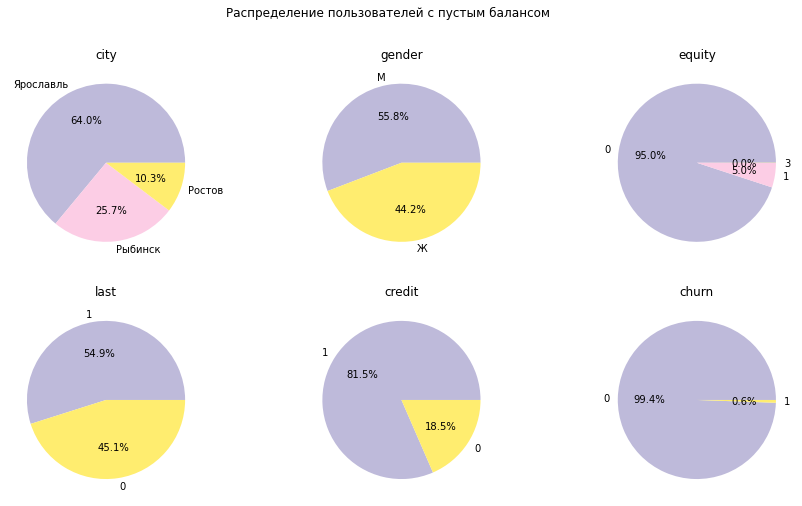

In [11]:
# зададим сабплоты и название
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Распределение пользователей с пустым балансом')
# сохраним названия колонок в отдельную переменную
columns = check_balance.columns[0:6]
# зададим k=0, будем использовать данную переменную для выбора колонки
k = 0
#запишем цикл для построения пай чартов в сабплоте
for j in range(2):
    for i in range(3):
        df_i = (check_balance.groupby(columns[k]) # группируем данные по выбранному параметру
                .agg({'user_id':'count'})
                .sort_values(by='user_id',ascending=False)
               .reset_index())
        #задаем палитру
        colors = plt.get_cmap('Set3')(np.linspace(0.2, 1, len(df_i['user_id'])))
        # строим пай чарт
        axs[j,i].pie(df_i['user_id'], labels = df_i[columns[k]], autopct='%1.1f%%', colors = colors)
        # добавляем название к пай чартам
        axs[j,i].set_title(columns[k].split('_')[0])
        # прибавляем к переменной k 1, чтобы перейти к следующей колонке
        k += 1
plt.show()

На пай-чартах мы не видим зависимости между пропусками в колонке balance и городом, полом клиента и последней активностью.

81.5% клиентов с пропусками в колонке balance имеют кредитную карту, у 95% таких клиентов оценка собственности равна 0, а 99.4% таких клиентов не ушли из банка

По оставшимся числовым столбцам построим гистограммы

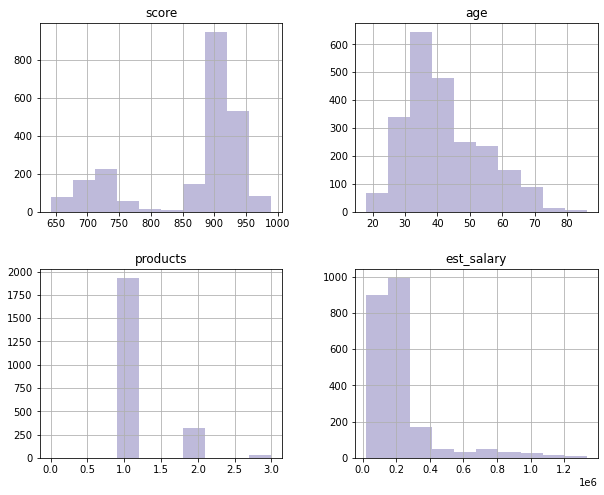

In [12]:
#построим общую гистограмму
x=[1]
colors = plt.get_cmap('Set3')(np.linspace(0.2, 1, len(x)))
no_balance[['score','age','products','est_salary']].hist(figsize=(10,8), color = colors)
plt.show()

На гистограммах мы видим, что у большинства клиентов с пустым балансом всего 1 продукт банка - и у 81.5% таких клиентов это кредитная карта. Распределение данных колонок Age и Est_salary похожи на пуассоновское распределение и не вызывают подозрений.

Распределение данных Score имеет разрыв в середине. Но зависимость между пустым балансом и оценкой score на графике не выявлена

То есть, клиенты с пустым балансом - преимущественно это клиенты с кредитной картой и только с ней, с оценкой стоимости равной 0, которые остаются клиентами банка. Возможно они используют только кредитную карту и их баланс равен 0 или даже ниже нуля.

У нас нет логичной альтернативы, чтобы запонить эти пропуски

### Приведение данных к нужному типу

In [13]:
# изменим тип данных
df['age'] = df['age'].astype('int')
df['credit_card'] = df['credit_card'].astype('bool')
df['last_activity'] = df['last_activity'].astype('bool')
df['churn'] = df['churn'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   bool   
 9   last_activity  9974 non-null   bool   
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   bool   
dtypes: bool(3), float64(3), int32(1), int64(3), object(2)
memory usage: 769.5+ KB


### Проверка на наличии аномалий, обработка аномалий

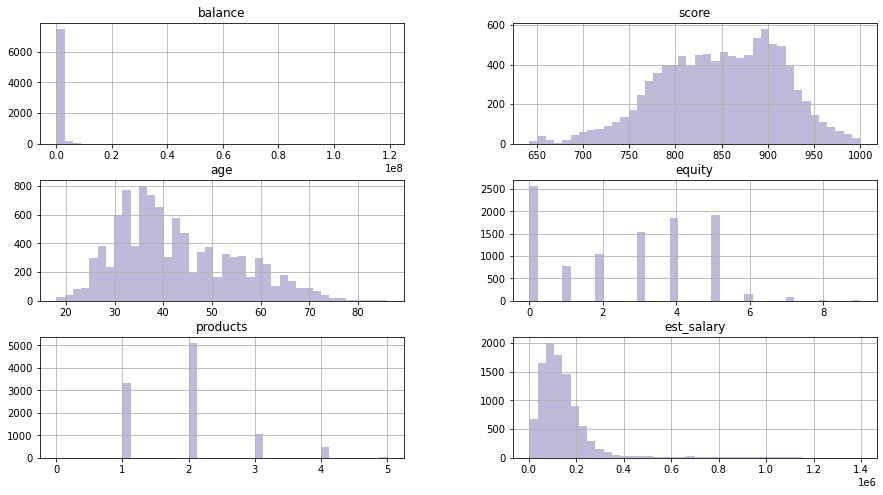

In [14]:
#построим общие гистограммы
df[['balance','score','age','equity','products','est_salary']].hist(bins = 40, figsize=(15,8),color = colors)
plt.show()

На гистограммах видим, что у нас есть возможные выбросы в колонках balance и est_salary

В колонке equity заметно большое скопление данных около 0, распределение не похоже на пуассоновское.

Рассмотрим данные поближе. Начнем с выбросов

**Рассчитаем 99ый персентиль для колонок balance и est_salary**

In [15]:
pc_balance = np.percentile(df[df['balance'] > 0]['balance'], 99)
pc_salary = np.percentile(df['est_salary'], 99)

Уберем выбросы из данных и посмотрим долю потерянных данных после удаления выбросов и пропусков из колонки Age

In [16]:
df = df[df['est_salary'] <= pc_salary]
df = df[(df['balance']<= pc_balance)|(df['balance'].isna()==True)]

print('Общая потеря данных после предобработки:{:.2%}'.format((1-df['user_id'].count()/10000)))

Общая потеря данных после предобработки:1.82%


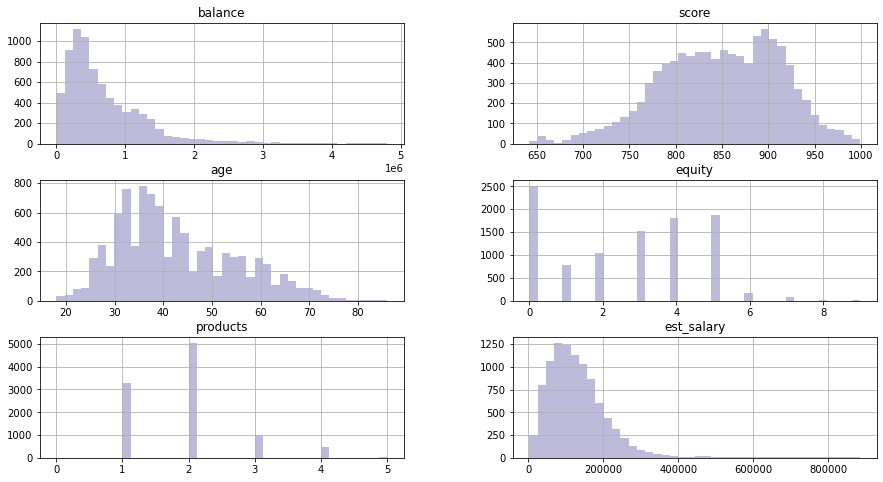

In [17]:
#построим общие гистограммы после исключения выбросов
df[['balance','score','age','equity','products','est_salary']].hist(bins = 40, figsize=(15,8),color = colors)
plt.show()

### Закодируем неупорядоченные категориальные данные

Колонки city и age содержат в себе неупорядоченные категорияльаные данные. Для того, чтобы рассчитать корреляцию оттока клиента с данными переменными, закодируем их

In [18]:
# сделаем копии колонок
df['city_copy'] = df['city']
df['gender_copy'] = df['gender']
# закодируем созданные копии
df = pd.get_dummies(df,columns = ['city_copy','gender_copy'])
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль,gender_copy_Ж,gender_copy_М
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,0,1,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,0,1,0,1


**Предобработка данных завершена, можем приступить к дальнейшему анализу**

## Исследовательский анализ данных

### Категоризация данных

Категоризуем данные в колонках balance, score,age, est_salary

Для начала посмотрим их нормализованное распределение с разбивкой на отточных и неоттточных клиентов

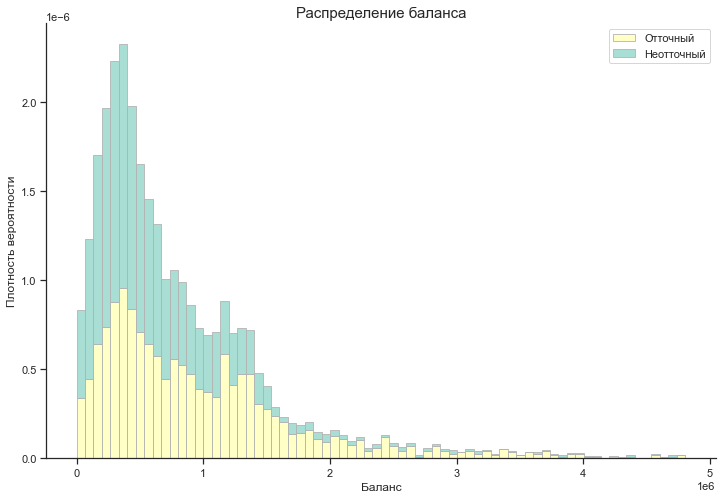

In [19]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
# Define the palette
palette = sns.color_palette('Set3',n_colors = 2)

sns.histplot(
    df,
    x="balance", hue="churn",
    stat = 'density',
    multiple="stack",
    palette=palette,
    common_norm=False,
    edgecolor=".7"
)

ax.set_title('Распределение баланса', fontsize=15)
ax.set(ylabel = 'Плотность вероятности',
    xlabel = 'Баланс')
ax.legend(['Отточный', 'Неотточный'])
plt.show()

In [20]:
# функция для построение гистограммы
def churn_hist(column1,title,xtext):
    sns.set_theme(style="ticks")

    f, ax = plt.subplots(figsize=(12, 6))
    sns.despine(f)
    # Define the palette
    palette = sns.color_palette('Set3',n_colors = 2)

    sns.histplot(
        df,
        x=column1, hue="churn",
        stat = 'density',
        multiple="stack",
        palette=palette,
        common_norm=False,
        edgecolor=".7"
    )

    ax.set_title(title, fontsize=15)
    ax.set(ylabel = 'Плотность вероятности',
        xlabel = xtext)
    ax.legend(['Отточный', 'Неотточный'])
    plt.show()

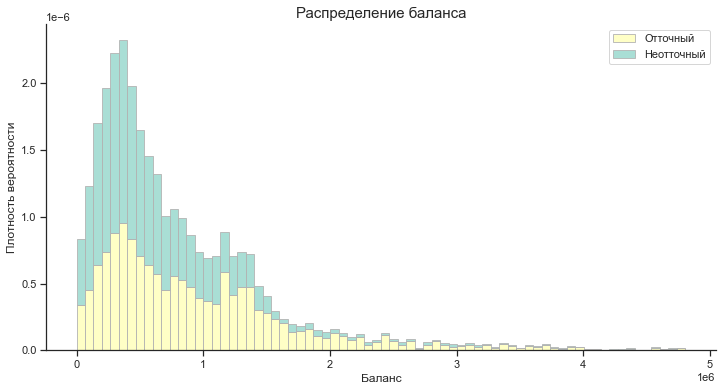

In [21]:
churn_hist('balance','Распределение баланса','Баланс')

По балансу выделим следующие группы: 
- от 0 до 300тыс
- от 300 тыс до 700тыс
- от 700тыс до 1 млн
- от 1 млн

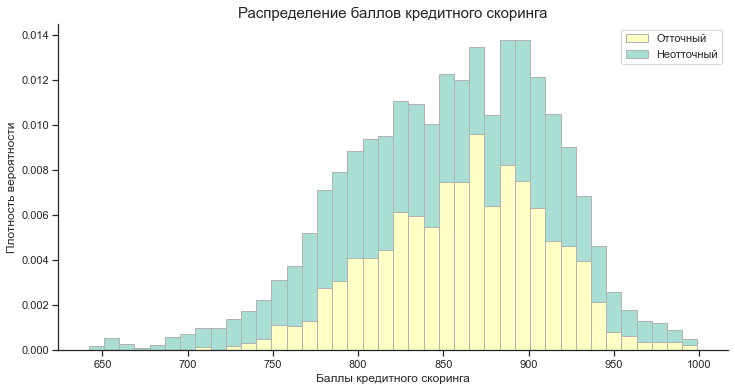

In [22]:
churn_hist('score','Распределение баллов кредитного скоринга','Баллы кредитного скоринга')

По баллам кредитного скоринга выделим следующие группы: 
- от 0 до 750
- от 750 тыс до 850
- от 850 до 900
- от 900

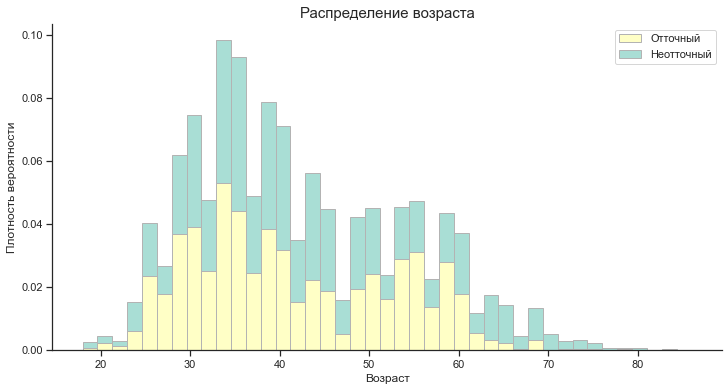

In [23]:
churn_hist('age','Распределение возраста','Возраст')

По возрасту выделим следующие группы: 
- до 25 лет
- от 25 до 40
- от 40 до 50
- от 50 до 60
- старше 60

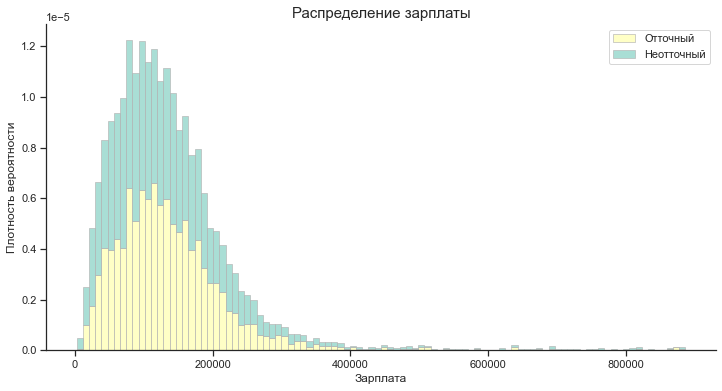

In [24]:
churn_hist('est_salary','Распределение зарплаты','Зарплата')

По зарплате выделим следующие группы: 
- до 30тыс
- от 30тыс до 100тыс
- от 100тыс до 300тыс
- от 300тыс до 500тыс
- Выше 500тыс

Добавим колонки с категоризацией данных

In [25]:
# Функция, для категоризации баланса
def balance_group(k):  
    if k < 300000:
        return '1. до 300тыс'
    if k < 700000:
        return '2. от 300тыс до 700 тыс'
    if k < 1000000:
        return '3. от 700тыс до 1 млн'
    return '4. от 1 млн'

In [26]:
# Функция, для категоризации кредитного скоринга
def score_group(k):  
    if k < 750:
        return '1. до 750'
    if k < 850:
        return '2. от 750 до 850'
    if k < 900:
        return '3. от 850 до 900'
    return '3. от 900'

In [27]:
# Функция, для категоризации возраста
def age_group(age): 
    if age < 25:
        return '1. до 25'
    if age < 40:
        return '2. от 25 до 40'
    if age < 50:
        return '3. от 40 до 50'
    if age < 60:
        return '4. от 50 до 60'
    return '5. старше 60'

In [28]:
# Функция, для категоризации зарплаты
def salary_group(k):  
    if k < 30000:
        return '1. до 30тыс'
    if k < 100000:
        return '2. от 30тыс до 100тыс'
    if k < 300000:
        return '3. от 100тыс до 300тыс'
    if k < 500000:
        return '4. от 300тыс до 500тыс'
    return '5. выше 500 тыс'

In [29]:
df['balance_group'] = df['balance'].apply(balance_group)
df['score_group'] = df['score'].apply(score_group)
df['age_group'] = df['age'].apply(age_group)
df['salary_group'] = df['est_salary'].apply(salary_group)

In [30]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль,gender_copy_Ж,gender_copy_М,balance_group,score_group,age_group,salary_group
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,1,0,1,0,1. до 300тыс,3. от 850 до 900,2. от 25 до 40,2. от 30тыс до 100тыс
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,1,0,1,0,3. от 700тыс до 1 млн,3. от 850 до 900,2. от 25 до 40,2. от 30тыс до 100тыс
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,0,1,0,1,0,4. от 1 млн,3. от 850 до 900,2. от 25 до 40,3. от 100тыс до 300тыс
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,0,1,1,0,4. от 1 млн,3. от 850 до 900,4. от 50 до 60,3. от 100тыс до 300тыс
4,157978,730.00,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,0,1,0,1,1. до 300тыс,1. до 750,2. от 25 до 40,2. от 30тыс до 100тыс


### Общие графики распределения

In [31]:
# выберем колонки для первых пай-чартов
for_pie_charts = (df[['city','gender', 'products',
                      'last_activity','credit_card','churn','user_id']])

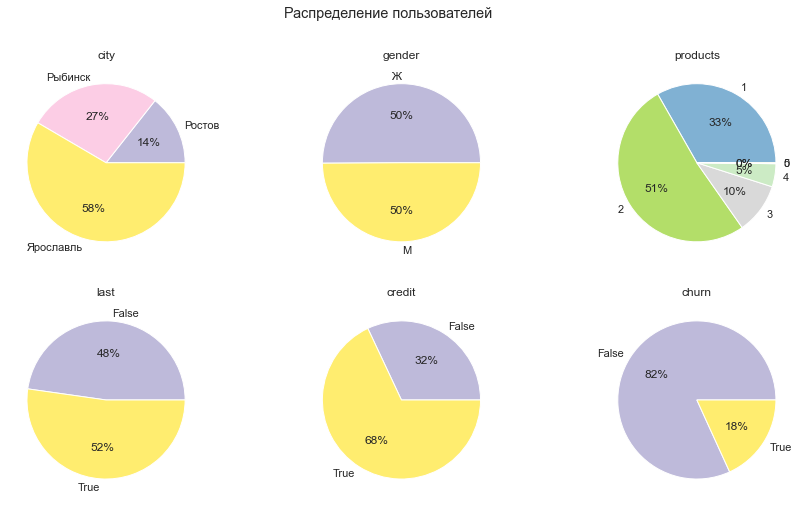

In [32]:
# зададим сабплоты и название
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Распределение пользователей')
# сохраним названия колонок в отдельную переменную
columns = for_pie_charts.columns[0:6]
# зададим k=0, будем использовать данную переменную для выбора колонки
k = 0
#запишем цикл для построения пай чартов в сабплоте
for j in range(2):
    for i in range(3):
        df_i = (for_pie_charts.groupby(columns[k]) # группируем данные по выбранному параметру
                .agg({'user_id':'count'})
               .reset_index())
        #задаем палитру
        colors = plt.get_cmap('Set3')(np.linspace(0.2, 1, len(df_i['user_id'])))
        # строим пай чарт
        axs[j,i].pie(df_i['user_id'], labels = df_i[columns[k]], autopct='%1.0f%%', colors = colors)
        # добавляем название к пай чартам
        axs[j,i].set_title(columns[k].split('_')[0])
        # прибавляем к переменной k 1, чтобы перейти к следующей колонке
        k += 1
plt.show()

На графиках видим:
- 58% клиентов проживат в Ярославле, 27% - в Рыбинске и 14% - в Ростове
- Мужчин и женщин примерно равное количество : 50:50
- у 51% клиентов 2 продукта банка, у 33% - всего 1 продукт
- 52% клиентов проявляли активность за последние 30 дней
- у 68% клиентов есть кредитная карта
- **18.2% клиента являются отточными**

In [33]:
# выберем колонки для оставшихся пай-чартов
for_pie_charts2 = (df[['equity','balance_group','score_group','age_group','salary_group','churn','user_id']])

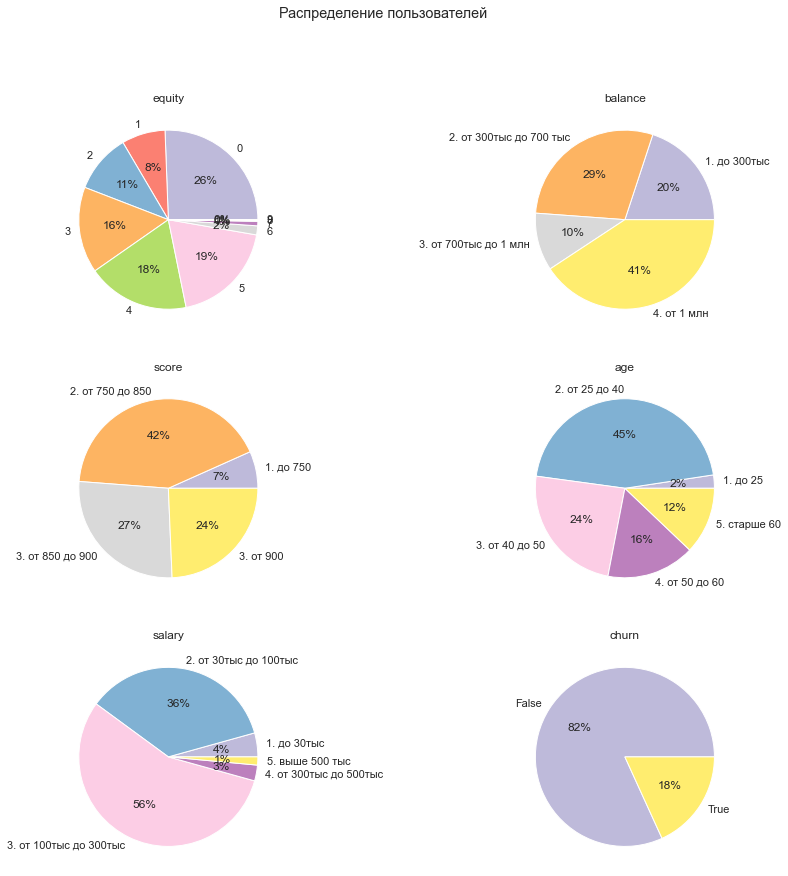

In [34]:
# зададим сабплоты и название
fig, axs = plt.subplots(3, 2, figsize=(15, 14))
fig.suptitle('Распределение пользователей')
# сохраним названия колонок в отдельную переменную
columns = for_pie_charts2.columns[0:6]
# зададим k=0, будем использовать данную переменную для выбора колонки
k = 0
#запишем цикл для построения пай чартов в сабплоте
for j in range(3):
    for i in range(2):
        df_i = (for_pie_charts2.groupby(columns[k]) # группируем данные по выбранному параметру
                .agg({'user_id':'count'})
               .reset_index())
        #задаем палитру
        colors = plt.get_cmap('Set3')(np.linspace(0.2, 1, len(df_i['user_id'])))
        # строим пай чарт
        axs[j,i].pie(df_i['user_id'], labels = df_i[columns[k]], autopct='%1.0f%%', colors = colors)
        # добавляем название к пай чартам
        axs[j,i].set_title(columns[k].split('_')[0])
        # прибавляем к переменной k 1, чтобы перейти к следующей колонке
        k += 1
plt.show()

- у 26% клиентов оценка собственности 0, у 19% - 5, у 18% - 4
- у 41% клиентов баланс больше 1 млн, у 29% - от 300тыс до 700 тыс, у 20% - ниже 300 тыс, а у 10% - от 700тыс до 1 млн
- у 42% клиентов кредитный скоринг от 750 до 850 баллов, у 27% - от 850 до 900, а у 24% - от 900 баллов
- 45% клиентов находятся в возрасте от 25 до 40 лет, 24% - от 40 до 50 лет
- у 56% клиентов заработная плата от 100тыс до 300 тыс, у 36% - от 30 тыс до 100 тыс

### Общие графики с разбивкой на отточных и неотточных клиентов

Посмотрим, как распределяются данные между отточными и неотточными клиентами.

In [35]:
print('Средняя доля отточных клиентов в банке:', 
      round(df.query('churn == True')['user_id'].count()/df['user_id'].count()*100,1))

Средняя доля отточных клиентов в банке: 18.2


Построим столбчатые диаграммы с долей отточных и неотточных клиентов

In [36]:
#напишем функцию для построения столбчатой диаграммы
def churn_bar(column1, title, x_ax_text, y_ax_text):
    
    #Группируем данные по нужному столбцу
    data = (df.groupby([column1,'churn'])
            .agg({'user_id':'count'})
            .reset_index()) 
    grouped = df.groupby([column1]).agg({'user_id':'count'}).reset_index().rename(columns = {'user_id':'user_sum'})
    data = data.merge(grouped, on=column1, how='left')
    #Добавляет столбец с долей
    data['ratio'] = round(data['user_id']/data['user_sum']*100,1) #Добавляет столбец с долей
    
    #Задаем стиль графика
    sns.set_theme(style='white')

    f, ax = plt.subplots(figsize=(9, 6)) # задаем размер графика
    sns.despine(f) #оставим видимыми только оси
    #Определим палитру
    palette = sns.color_palette('Set3',n_colors = 2)

    #строим столбчатую диаграмму
    sns.barplot(data = data, 
                x=column1, 
                y='ratio', 
                hue = 'churn', #задаем разные цвета для отточных и неотточных клиентов
                palette=palette)

    ax.bar_label(ax.containers[0]) #добавляем надписи на столбцы
    ax.bar_label(ax.containers[1]) #добавляем надписи на столбцы
    ax.set_title(title, fontsize=15) #название графика
    ax.set(ylabel = y_ax_text,
        xlabel = x_ax_text) # название осей
    ax.tick_params(axis='x', rotation=8)
    plt.legend(title='Отточный ли клиент',bbox_to_anchor=(1.05, 1),
                             loc='upper left') # задаем название и положение легенды
    plt.show()

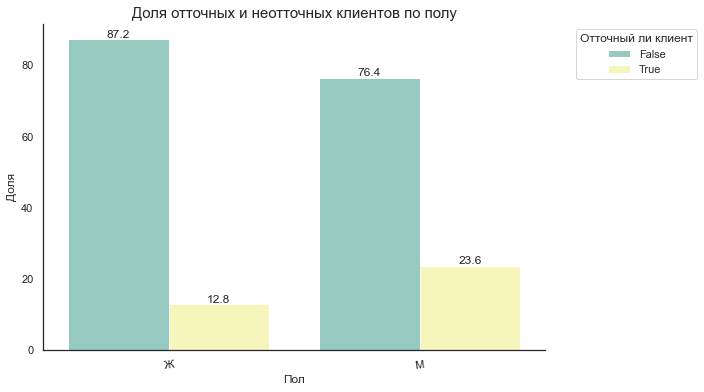

In [37]:
churn_bar('gender','Доля отточных и неотточных клиентов по полу','Пол','Доля')

Среди мужчин доля отточных клиентов выше средней: 23.6% (среднняя 18.2%)

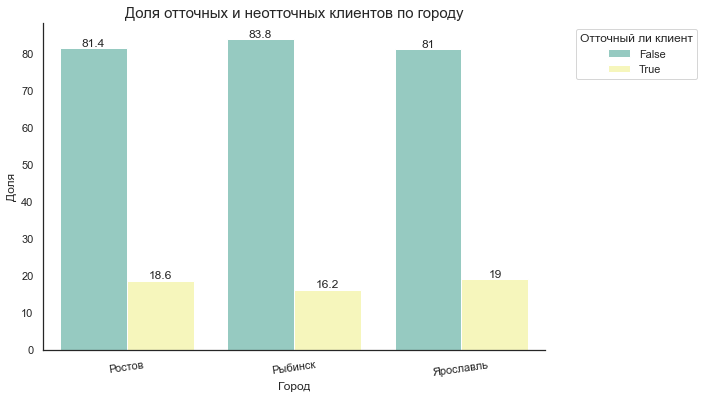

In [38]:
churn_bar('city', 'Доля отточных и неотточных клиентов по городу','Город','Доля')

Здесь выше средней(18.2%) доли отточных клиентов в Ярославле (19%) и Ростове (18.6%)

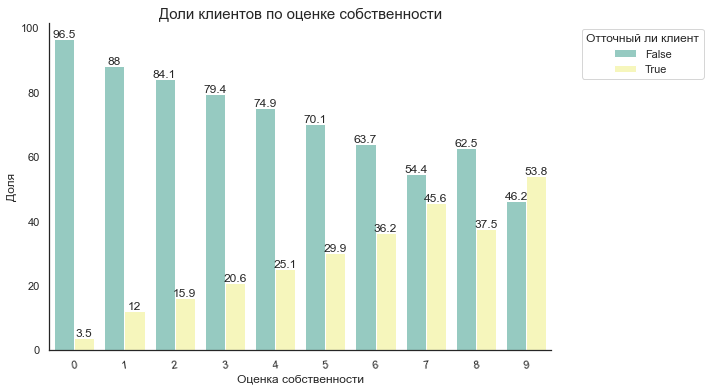

In [39]:
churn_bar('equity', 'Доли клиентов по оценке собственности','Оценка собственности','Доля')

На графике видим, что чем больше оценка собственности, тем больше доля отточных клиентов. У категорий клиентов, у которых оценка собственности больше 2х, доля отточных клиентов выше средней доли отточных клиентов (18.2%)

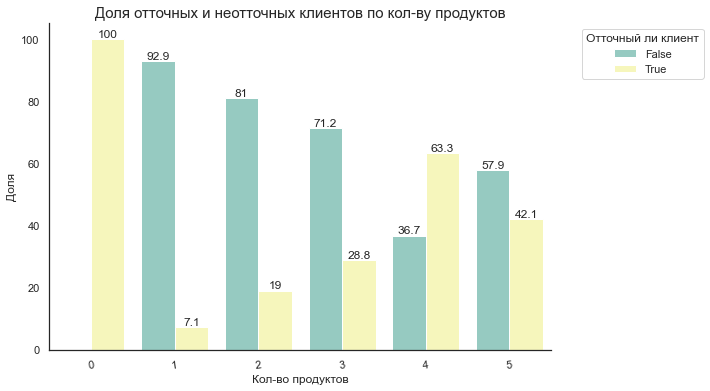

In [40]:
churn_bar('products', 'Доля отточных и неотточных клиентов по кол-ву продуктов','Кол-во продуктов','Доля')

100% людей, у кого 0 продуктов этого банка - отточные. Тут также прослеживается зависимость: чем больше продуктов, тем более вероятность оттока клиентов. У категорий клиентов, у кого 2 продукта и выше, доля отточных клиентов выше среднего

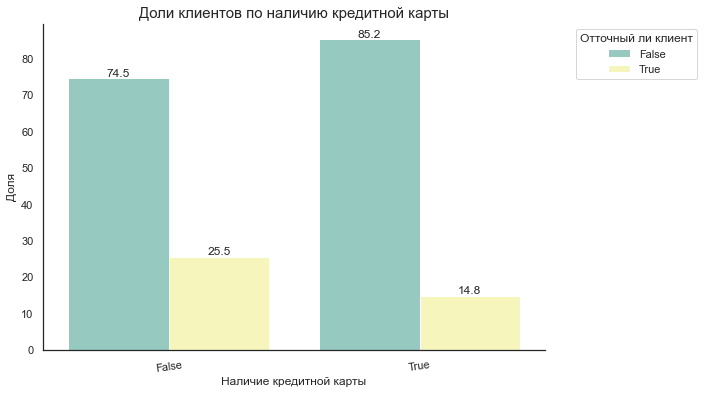

In [41]:
churn_bar('credit_card', 'Доли клиентов по наличию кредитной карты','Наличие кредитной карты','Доля')

Среди клиентов, у кого нет кредитной карты, доля отточных клиентов выше средней (25.5%)

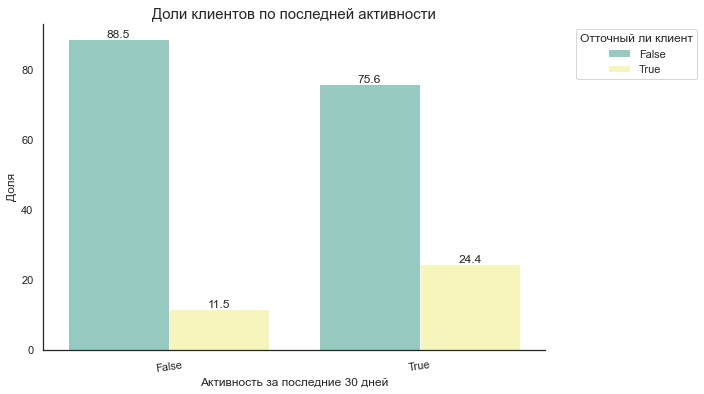

In [42]:
churn_bar('last_activity', 'Доли клиентов по последней активности','Активность за последние 30 дней','Доля')

Среди клиентов, кто были активные за последние 30 дней, доля отточных клиентов выше средней (24.4%)

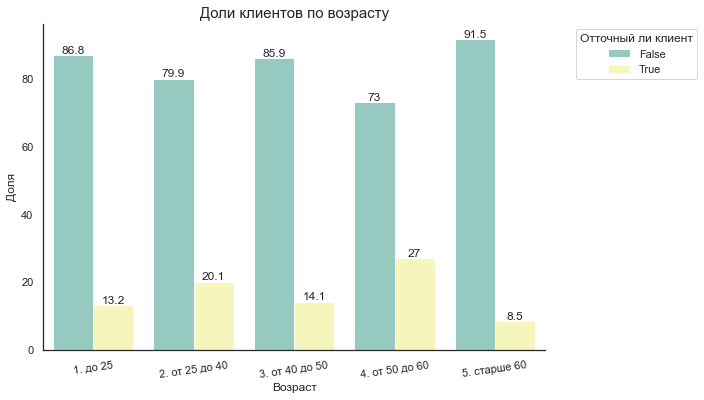

In [43]:
churn_bar('age_group', 'Доли клиентов по возрасту','Возраст','Доля')

Доля отточных клиентов выше средней среди клиентов в следующих категориях: от 25 до 40 лет(20.1%), от 50 до 60 лет(27%)

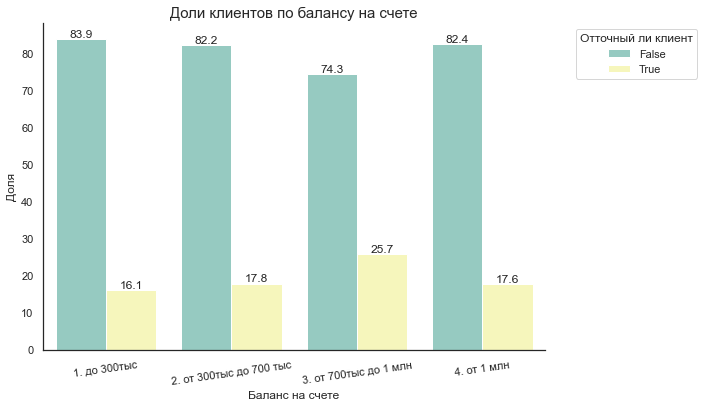

In [44]:
churn_bar('balance_group', 'Доли клиентов по балансу на счете','Баланс на счете','Доля')

На графике видим, что доля отточных клиентов выше средней у клиентов с балансом от 700тыс до 1 млн (доля отточных клиентов равна 25.7%)

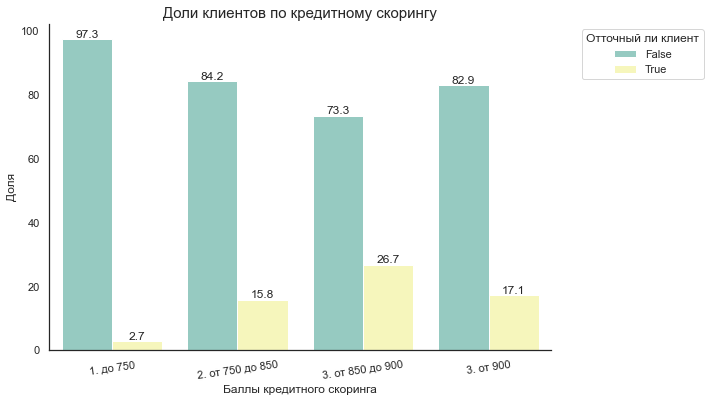

In [45]:
churn_bar('score_group', 'Доли клиентов по кредитному скорингу','Баллы кредитного скоринга','Доля')

Доля отточных клиентов выше средней у клиентов с кредитным скорингом от 850 до 900 баллов (доля отточных клиентов равна 26.7%)

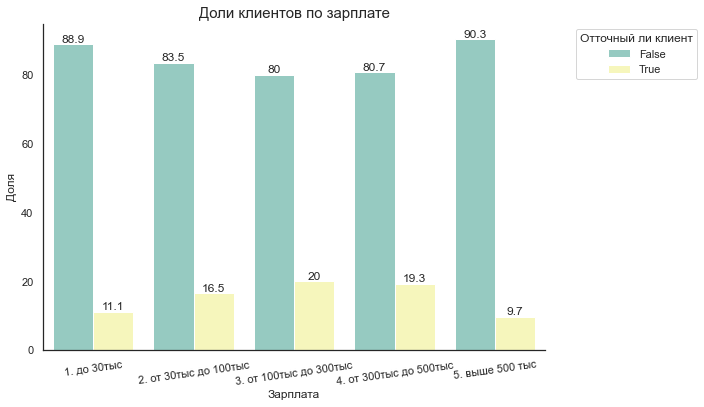

In [46]:
churn_bar('salary_group', 'Доли клиентов по зарплате','Зарплата','Доля')

Доля отточных клиентов выше средней у клиентов с зарплатой от 100тыс до 300тыс (20%) и от 300тыс до 500тыс (19.3%)

Подведем итоги по анализу графиков с разбивкой на отточных и неотточных клиентов, выделим категории клиентов, в которых процент отточных клиентов выше среднего (средний процент отточных клиентов равен 18.2%)

1. По полу: мужчины (доля отточных клиентов 23.6%)
2. По городу: Ярославль (19%) и Ростов (18.6%)
3. По оценке собственности: доля отточных клиентов выше средней у категорий с оценкой стоимости больше 2х. Самая высокая доля отточных клиентов среди категорий с оценкой стоимости 7 (45.6%), 8 (37.5%) и 9 (53.8%)
4. По количеству продуктов: доля отточных клиентов выше средней у категорий с 2я или более продуктами. Самая высокая доля отточных клиентов среди категорий с 4 (63.3%) и 5 (42.1%) продуктами
5. По наличию кредитной карты: среди тех, у кого нет кредитной карты, доля отточных клиентов выше средней (25.5%)
6. По активности за последние 30 дней: у активных клиентов доля отточных выше средней (24.4%)
7. По возрасту: 50-60 лет (27%) и 25-40 лет (20.1%)
8. По балансу: баланс от 700 тыс до 1 млн (25.7%)
9. По баллам кредитного скоринга: от 850 до 900 (26.7%)
10. По зарплате: от 100тыс до 300тыс (20%) и от 300тыс до 500тыс (19.3%)

### Расчет корреляции

Для выявления зависимостей построим матрицу корреляции

In [47]:
corr = df.drop(columns = 'user_id').corr()

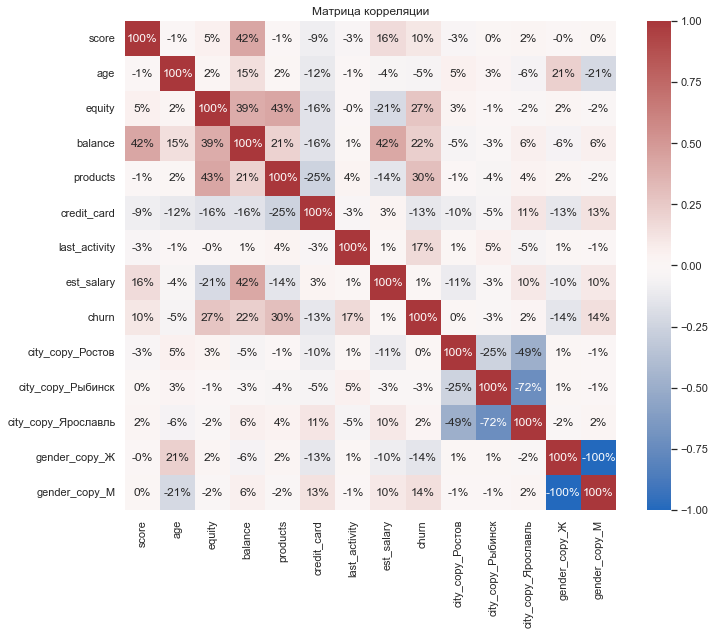

In [48]:
# Построим тепловую карту по таблице корреляции
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            cmap="vlag", #задаем цветовую палитру
            center=0, # обозначаем среднее значение
            annot=True, # Добавляем подписи к ячейкам
            fmt=".0%") #задаем формат подписей

ax.set_title('Матрица корреляции')
plt.show()

Самую высокую корреляцию мы видим у следующих пар: 
- Equity и Products: корреляция 43%
- Score и Balance: корреляция 42%
- Balance и Est_salary: корреляция 42%

Рассмотрим ближе корреляцию факта оттока с другими признаками

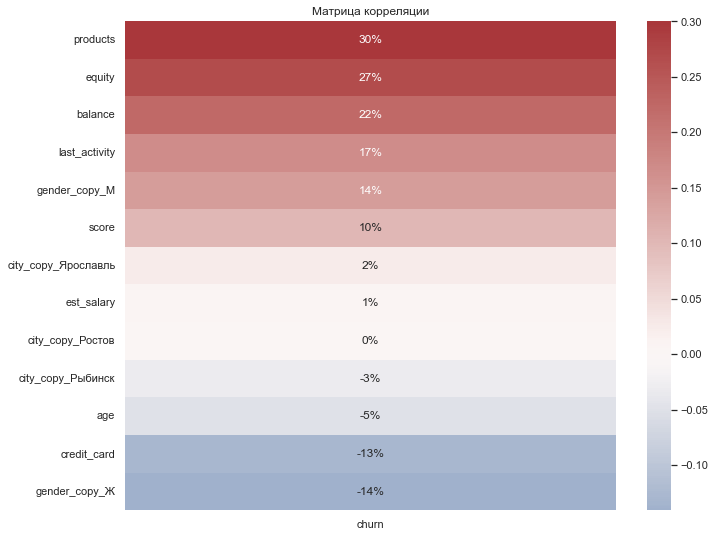

In [49]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr.loc[:,['churn']].drop('churn').sort_values('churn', ascending = False), 
            cmap="vlag", #задаем цветовую палитру
            center=0, # обозначаем среднее значение
            annot=True, # Добавляем подписи к ячейкам
            fmt=".0%") #задаем формат подписей

ax.set_title('Матрица корреляции')
plt.show()

Корреляция оттока со всеми признаками, кроме количества продуктов, слабая. 

Наибольшая корреляция выявлена с признаком количества продуктов - 30%

## Сегментация

Ранее мы изучили графики распределения данных с разбивкой на отточных и неотточных клиентов, выделили тенденции, а также посчитали корреляции. 

Используя полученные результаты анализа, выделим сегменты с высокой долей отточных клиентов:

### Сегмент 1

**1) Клиенты с 2я и более продуктами банка, у которых кредитный скоринг 850-900 баллов**

In [50]:
segment_1 = df.query('products >=2').query('score_group == "3. от 850 до 900"')
print('Размер сегмента 1:',segment_1['user_id'].count())

Размер сегмента 1: 1871


In [51]:
table = segment_1.groupby('churn').agg({'churn':'count'}).rename(columns={'churn':'count_clients'})
table['percent'] = round(table['count_clients']/table['count_clients'].sum()*100,1)
table

,count_clients,percent
churn,,
False,1245,66.50
True,626,33.50


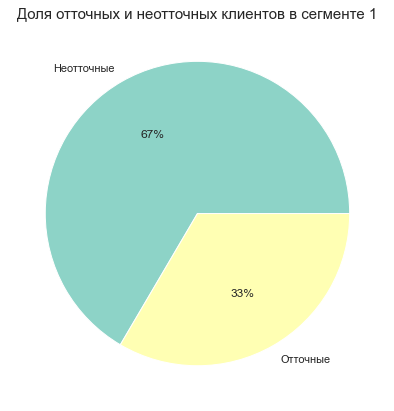

In [52]:
# построим круговую диаграмму
seg_1_pie = segment_1.groupby('churn').agg({'user_id':'count'}).reset_index()

colors = sns.color_palette('Set3',n_colors = 2)
plt.figure(figsize=(7,7))
plt.pie(seg_1_pie['user_id'], 
        labels=['Неотточные','Отточные'], 
        autopct='%.0f%%',
        colors = colors)

plt.title('Доля отточных и неотточных клиентов в сегменте 1',fontsize=15)
plt.show()

<div style="border:solid #20b2aa 2px; padding: 20px">
В первый сегмент вошли клиенты, у которых 2 и более продуктов банка и кредитный скоринг 850-900 быллов. Размер такого сегмента 1871 клиент. 

**В данном сегменте доля отточных клиентов равна 33.5%**

Изучим данный сегмент

In [53]:
#напишем функцию для построения столбчатой диаграммы
def churn_bar_fun(dat,column1,title):
    
    data = (dat.groupby([column1])
            .agg({'user_id':'count'})
            .reset_index()) #Группируем данные по нужному столбцу
    data['ratio'] = round(data['user_id']/data['user_id'].sum()*100,1) #Добавляет столбец с долей
    
    #Задаем стиль графика
    sns.set_theme(style='white')

    f, ax = plt.subplots(figsize=(9, 6)) # задаем размер графика
    sns.despine(f) #оставим видимыми только оси
    n_colors = data[column1].nunique()
    #Определим палитру
    palette = sns.color_palette('Set3',n_colors = n_colors)
    
    #строим столбчатую диаграмму
    sns.barplot(data = data, 
                x=column1, 
                y='user_id',
                palette=palette
               )

    ax.bar_label(ax.containers[0]) #добавляем надписи на столбцы
    ax.set_title(title, fontsize=15) #название графика
    ax.set(ylabel = 'count') # название осей
    ax.tick_params(axis='x', rotation=8)
    #plt.legend(title='Отточный ли клиент',bbox_to_anchor=(1.05, 1),
    #                         loc='upper left') # задаем название и положение легенды
    plt.show()

In [54]:
#выберем колонки, по которым будем строить столбчатые диаграммы
columns = ['city','gender','equity','credit_card','last_activity','balance_group','age_group','salary_group']

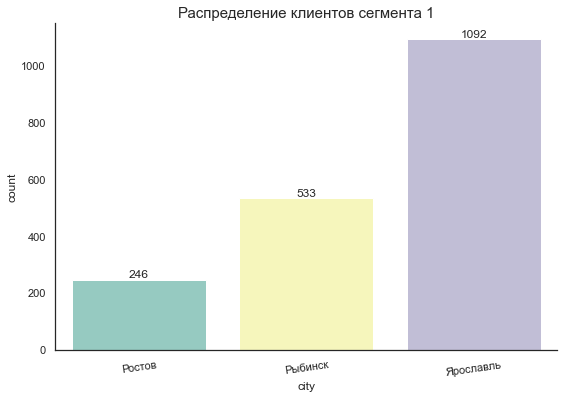

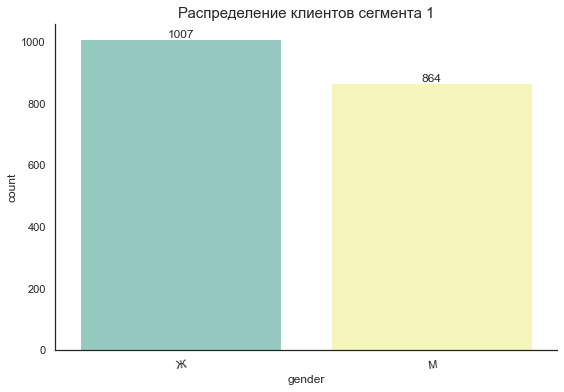

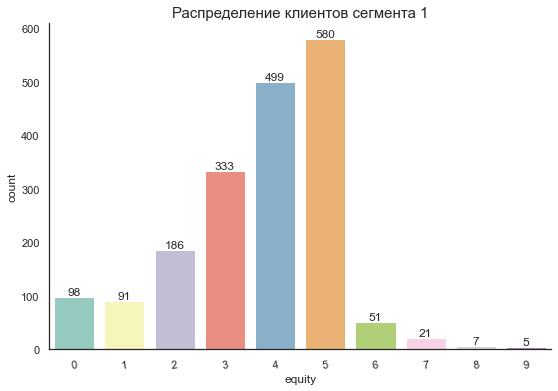

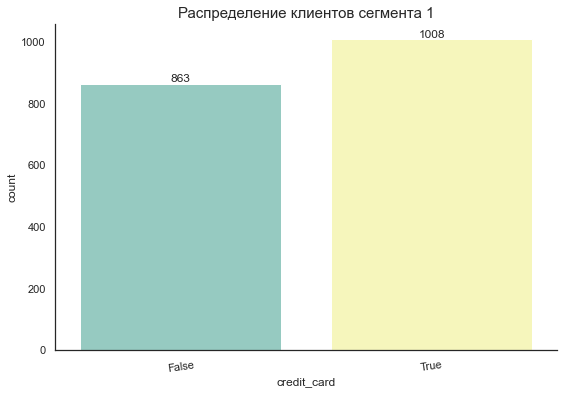

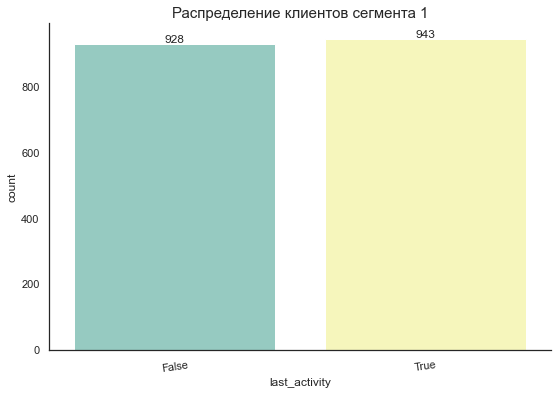

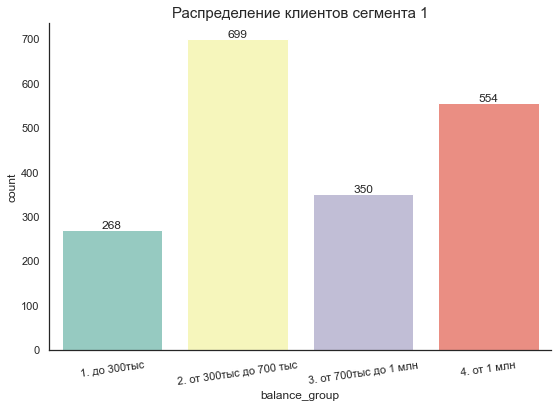

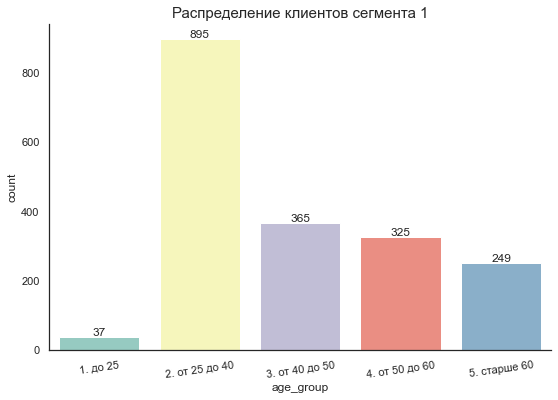

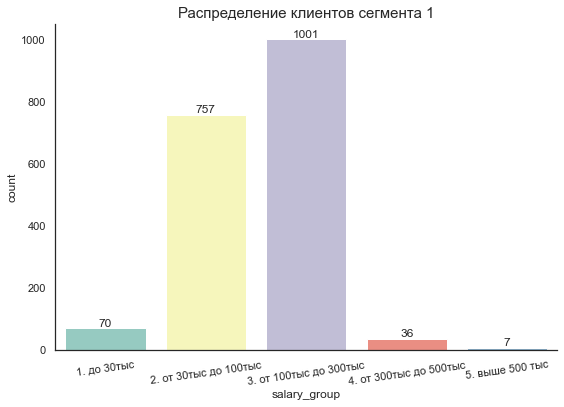

In [55]:
for column in columns:
    churn_bar_fun(segment_1,column,'Распределение клиентов сегмента 1')

По графикам видим, что клиенты из этого сегмента преимущественно проживают в Ярославле, имеют оценку собственности 3-5 баллов, возраста от 25 до 40 лет, имеют доход от 30тыс до 300тыс

<div style="border:solid #20b2aa 2px; padding: 20px">
    
**Рекомендации**

- Проанализировать, использование каких продуктов банка наиболее влияет на отток
- Проанализировать интерфейс сайта на предмет удобства использования, если у клиента 2 и более продуктов банка

### Сегмент 2

**2) клиенты-мужчины, активные за последние 30 дней, владеющие кредитной картой**

In [56]:
segment_2 = df.query('gender == "М"').query('last_activity == True').query('credit_card == False')
print('Размер сегмента 2:',segment_2['user_id'].count())

Размер сегмента 2: 698


In [57]:
table = segment_2.groupby('churn').agg({'churn':'count'}).rename(columns={'churn':'count_clients'})
table['percent'] = round(table['count_clients']/table['count_clients'].sum()*100,1)
table

,count_clients,percent
churn,,
False,403,57.70
True,295,42.30


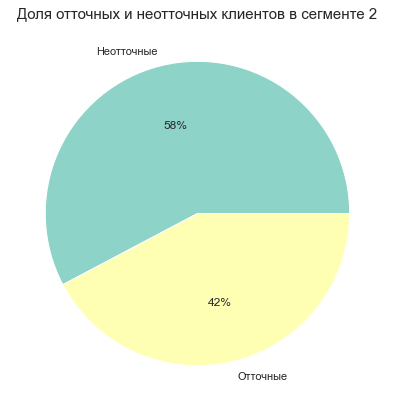

In [58]:
# построим круговую диаграмму
seg_2_pie = segment_2.groupby('churn').agg({'user_id':'count'}).reset_index()

colors = sns.color_palette('Set3',n_colors = 2)
plt.figure(figsize=(7,7))
plt.pie(seg_2_pie['user_id'], 
        labels=['Неотточные','Отточные'], 
        autopct='%.0f%%',
        colors = colors)

plt.title('Доля отточных и неотточных клиентов в сегменте 2',fontsize=15)
plt.show()

<div style="border:solid #20b2aa 2px; padding: 20px">
Во второй сегмент вошли мужчины с кредитной картой, которые проявляли активность за последние 30 дней. Размер такого сегмента 698 клиентов. 

В данном сегменте доля отточных клиентов равна 42.3%

In [59]:
#выберем колонки, по которым будем строить столбчатые диаграммы
columns = ['city','equity','products','balance_group','score_group','age_group','salary_group']

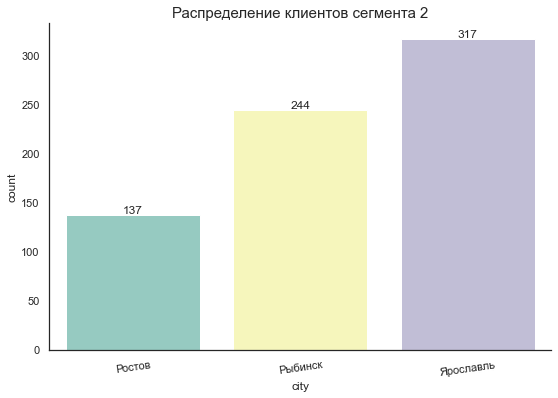

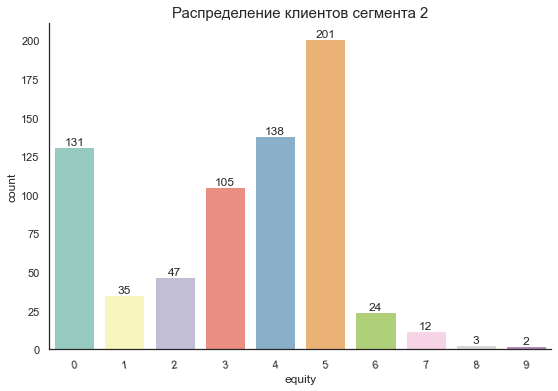

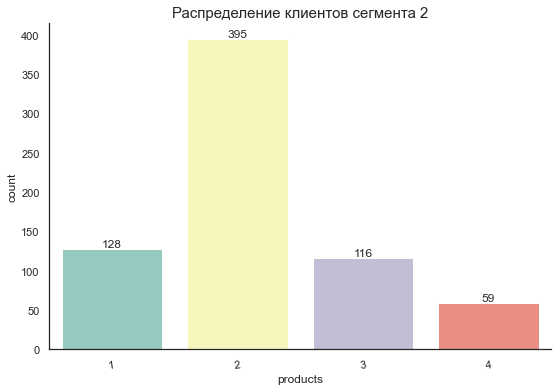

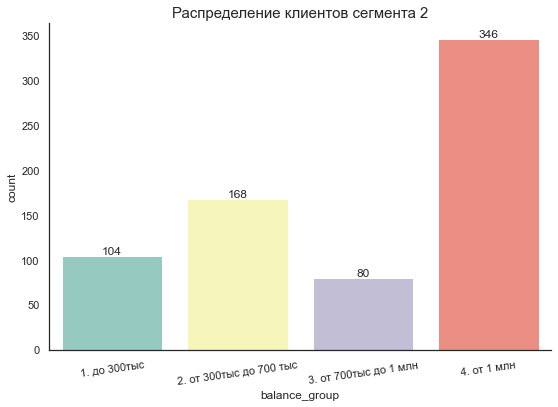

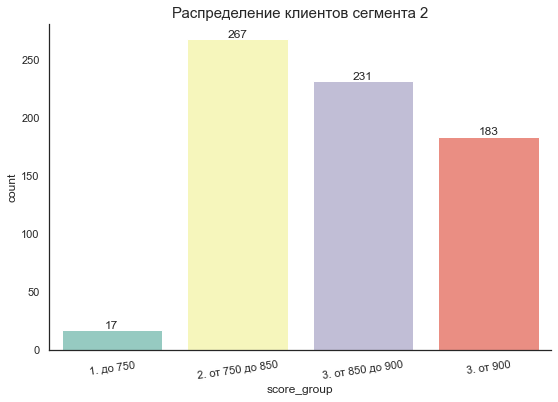

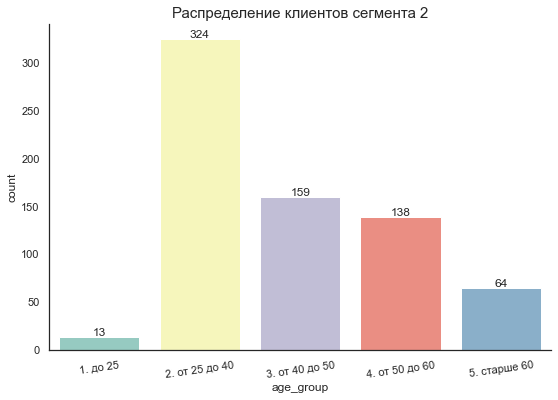

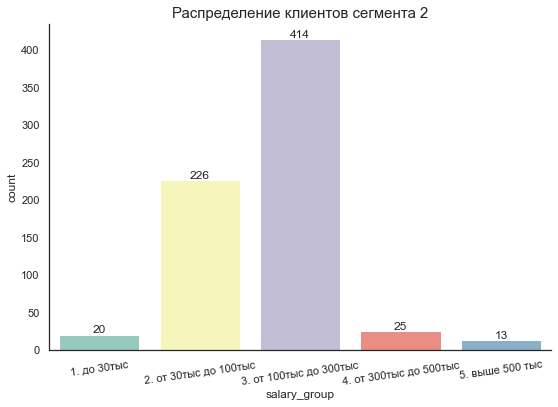

In [60]:
for column in columns:
    churn_bar_fun(segment_2,column,'Распределение клиентов сегмента 2')

По графикам видим, что клиенты из 2го сегмента преимущественно владеют 2я продуктами, с балансом на счете более 1 млн, возраста от 25 до 40 лет, с доходом от 100тыс до 300тыс

<div style="border:solid #20b2aa 2px; padding: 20px">
    
**Рекомендации**

- Проанализировать условия по депозитам и остатку на счете, предложить более выгодные условия
- Пересмотреть условия предоставления кредита, кредитный лимит

### Приоритезация сегментов

В 1м сегменте потенциально уйдут из банка 33.5% клиентов от размера сегмента, то есть 626 клиента. А во 2м потенциально уйдет 42.3%, то есть 295 клиента

Несмотря на то, что во 2м сегменте процент отточных клиентов выше, из-за размера выборки 1ый сегмент более приоритетный, чем 2ой.

**Рекомендуем отделу маркетинга сконцентрироваться на 1м сегменте: клиентах с 2я и более продуктами банка, у которых кредитный скоринг 850-900 баллов**

## Статистический анализ: проверка гипотез

Мы выдвинем 2 гипотезы на проверку:

1. Гипотеза о различиях доходов между теми клиентами, которые ушли, и теми, которые остались.
2. Гипотеза о различиях в количестве продуктов у отточных и неотточных клиентов

### Гипотеза 1 : о различиях доходов между теми клиентами, которые ушли, и теми, которые остались.

Для начала проверим, нормально ли распределены данные с зарплатой клиентов. Для этого воспользуемся критерием Шапиро-Уилка

Проверим распределение зарплаты клиентов:
- Ho: распределение нормальное
- Ha: распределение ненормальное

In [61]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(df['est_salary'])
p_value1 = results[1]

print('p-значение: ', p_value1)

if p_value1 < alpha:
    print('Отвергаем нулевую гипотезу: распределение зарплаты клиентов ненормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение зарплаты клиентов ненормально


C:\Users\dinay\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Значит данные распределены ненормально. **Тогда для проверки нашей гипотезы мы будем использовать непараметрический тест, а именно критерий Уилкоксона-Манна-Уитни**

Сформулируем гипотезы:
- **Ho: Доходы отточных и неотточных клиентов равны**
- **Ha: Доходы не равны**

In [62]:
#Сохраним в переменные зарплаты клиентов по группам: отточные и неотточные клиенты
ChurnClientsSalary = (df[df['churn'] == True]['est_salary'])

StayClientsSalary = (df[df['churn'] == False]['est_salary'])

In [63]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(ChurnClientsSalary, StayClientsSalary)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00021235841269987203
Отвергаем нулевую гипотезу: разница статистически значима


In [64]:
print('Относительная разница между средними зарплатами:',
      "{0:.2%}".format(ChurnClientsSalary.mean() / StayClientsSalary.mean() - 1))

Относительная разница между средними зарплатами: 1.21%


Рассчитанный p-value меньше 0.05. Значит можем отвергнуть нулевую гипотезу в пользу альтернативной, то есть **статистически значимые различия в доходах между группами есть**

Относительная разница между средней зарплатой отточных клиентов и неотточных равна 1.21%

### Гипотеза 2 : о различиях в количестве продуктов у отточных и неотточных клиентов

Для начала проверим, нормально ли распределены данные с количеством продуктов. Для этого воспользуемся критерием Шапиро-Уилка

Проверим распределение количества продуктов у клиентов:
- Ho: распределение нормальное
- Ha: распределение ненормальное

In [65]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(df['products'])
p_value1 = results[1]

print('p-значение: ', p_value1)

if p_value1 < alpha:
    print('Отвергаем нулевую гипотезу: распределение количества продуктов ненормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение количества продуктов ненормально


Значит данные распределены ненормально. **Тогда для проверки нашей гипотезы мы будем использовать непараметрический тест, а именно критерий Уилкоксона-Манна-Уитни**

Сформулируем гипотезы:

- **Ho: Количество продуктов у отточных и неотточных клиентов равны**
- **Ha: У отточных клиентов больше продуктов**

In [66]:
#Сохраним в переменные кол-во продуктов клиентов по группам: отточные и неотточные клиенты
ChurnClientsProducts = (df[df['churn'] == True]['products'])

StayClientsProducts = (df[df['churn'] == False]['products'])

In [67]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(ChurnClientsProducts, StayClientsProducts)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  4.899587191017993e-158
Отвергаем нулевую гипотезу: разница статистически значима


In [68]:
print('Относительная разница между средними зарплатами:',
      "{0:.2%}".format(ChurnClientsProducts.mean() / StayClientsProducts.mean() - 1))

Относительная разница между средними зарплатами: 35.01%


In [69]:
ChurnClientsProducts.mean()

2.3751399776035833

In [70]:
StayClientsProducts.mean()

1.7592131474103585

Рассчитанный p-value значительно меньше 0.05. Значит можем отвергнуть нулевую гипотезу в пользу альтернативной, то есть **статистически значимые различия в количестве продуктов на клиента между группами есть**

Относительная разница между средним количество продуктов на клиента среди отточных и неотточных клиентов равна 35%

## Выводы

<div style="border:solid #20b2aa 2px; padding: 20px">

**Целью** данного исследования было провести исследование клиентской базы регионального банка и выделить сегменты клиентов, которые склонны уходить. Результаты данного исследования будут использовтаься отделом маркетинга для для разработки дальнейшей маркетинговой стратегии по уменьшению доли отточных клиентов

**Средний процент оттока клиентов по банку равен 18.2%**
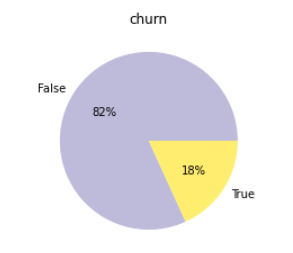

**В ходе исследования мы выделили следующие признаки, характерные отточным клиентам**: 
- мужчины (доля отточных клиентов 23.6%)
- из Ярославля (19%) или Ростова (18.6%)
- с оценкой стоимости больше 2х
- с 2я или более продуктами
- без кредитной карты (25.5%)
- проявлявшие активность за последние 30 дней (24.4%)
- возраста 50-60 лет (27%) или 25-40 лет (20.1%)
- с балансом от 700 тыс до 1 млн (25.7%)
- кредитный скоринг от 850 до 900 баллов (26.7%)
- с зарплатой от 100тыс до 300тыс (20%) или от 300тыс до 500тыс (19.3%)

Корреляция оттока со всеми признаками, кроме количества продуктов, слабая. **Наибольшая корреляция оттока выявлена с признаком количества продуктов - 30%**

**Мы выделили 2 сегмента клиентов, которые склонны уходить:**
1. В первый сегмент вошли клиенты, у которых **2 и более продуктов банка и кредитный скоринг 850-900 быллов**. Размер такого сегмента 1871 клиент.В данном сегменте **доля отточных клиентов равна 33.5%**
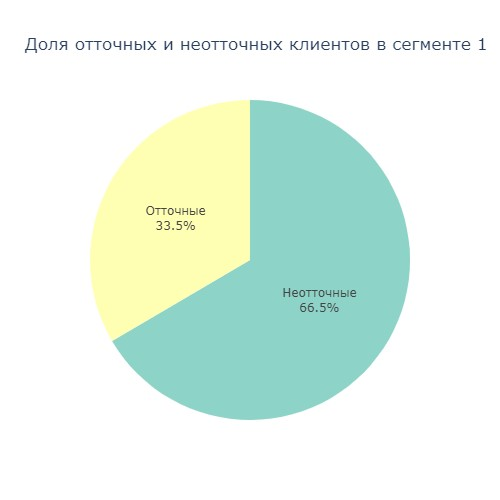

Данному сегменту характерны следующие признаки:
- преимущественно проживают в Ярославле
- имеют оценку собственности 3-5 баллов
- возраст от 25 до 40 лет
- имеют доход от 30тыс до 300тыс
    
**Рекомендации для сегмента1:**
- ***Проанализировать, использование каких продуктов банка наиболее влияет на отток***
- ***Проанализировать интерфейс сайта на предмет удобства использования, если у клиента 2 и более продуктов банка***
    
2. Во второй сегмент вошли **мужчины с кредитной картой, которые проявляли активность за последние 30 дней**. Размер такого сегмента 698 клиентов. В данном сегменте **доля отточных клиентов равна 42.3%**
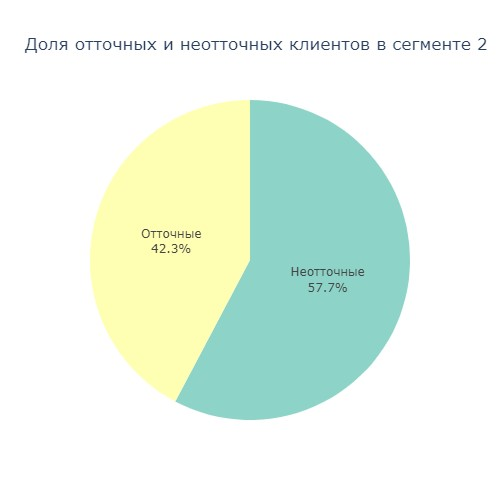
    
Данному сегменту характерны следующие признаки:
- преимущественно владеют 2я продуктами
- баланс на счете более 1 млн
- возраст от 25 до 40 лет
- имеют доход от 100тыс до 300тыс

**Рекомендации для сегмента2:**
- ***Проанализировать условия по депозитам и остатку на счете, предложить более выгодные условия***
- ***Пересмотреть условия предоставления кредита, кредитный лимит***
  
**Также были проверены 2 гипотезы:**
1. **О различиях доходов** между теми клиентами, которые ушли, и теми, которые остались. Тест гипотезы показал, что статистически значимые различия в доходах между группами есть. Относительная разница между средней зарплатой отточных клиентов и неотточных равна 1.21%
2. **О различиях в количестве продуктов** у отточных и неотточных клиентов. Тест гипотезы показал, что статистически значимые различия в количестве продуктов на клиента между группами есть. Относительная разница между средним количество продуктов на клиента среди отточных и неотточных клиентов равна 35%

**В результате исследования, мы рекомендуем маркетингу приоритезировать 1ый сегмент (клиенты, у которых 2 и более продуктов банка и кредитный скоринг 850-900 быллов)**